# Homework 4 - Wage Prediction
## Demetrios Lambropoulos

## Setup

### Import required APIs

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import transforms, pyplot as plt
%matplotlib inline

### Read CSV for Mid-Atlantic Wage Data

In [0]:
# Read the age and wage columns from the CSV
df = pd.read_csv(
    "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Wage.csv",
                  usecols=['age', 'wage'])

# Display first 5 elements in each of the dataframes columns
df.head()

,age,wage
0,18,75.043154
1,24,70.476020
2,45,130.982177
3,43,154.685293
4,50,75.043154


## Polynomial Regression

### Build degree 4 polynomial with input feature `age` and `wage`. 

Text(0.5, 0, 'age')

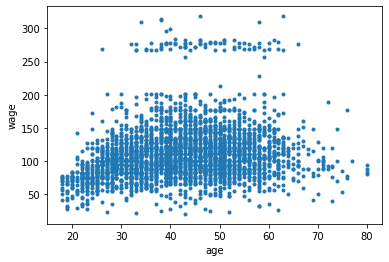

In [0]:
# Visualize age vs wage
plt.plot(df['age'], df['wage'], '.')

# Label the Y-axis
plt.ylabel("wage")

# Label the X-axis
plt.xlabel("age")

In [0]:
# Create an empty input matrix
X = []

# Populate the matrix
for i in range (len(df['age'])):
  X.append([])
  for j in range (5):
    X[i].append(df.at[i,'age'] **  j)

# Convert list to numpy array
X = np.array(X)

# Populate the y matrix    
y = df['wage']

# Convert y to a numpy array
y = np.array(y)

In [0]:
# Calculate the beta values using the normal equation
beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(), 
                                X)),X.transpose()), y)

In [0]:
# Display beta values
print("Beta 0:",beta[0])
print("Beta 1:",beta[1])
print("Beta 2:",beta[2])
print("Beta 3:",beta[3])
print("Beta 4:",beta[4])

Beta 0: -184.15417977546934
Beta 1: 21.24552053145417
Beta 2: -0.5638593125392688
Beta 3: 0.006810687713902145
Beta 4: -3.2038303747730534e-05


### Plot the regression curve 

[-1.84154180e+02  2.12455205e+01 -5.63859313e-01  6.81068771e-03
 -3.20383037e-05]


Text(0.5, 0, 'age')

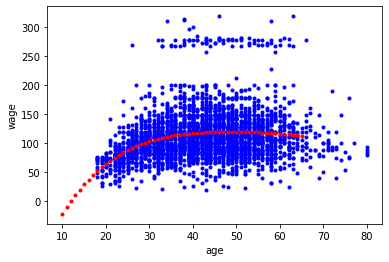

In [0]:
 #X_test = np.arange(start=0, stop=100, step=1)
# Create an empty list
X_test = []

# Populate the list with matrix elements
for i in range(len(np.arange(start=20,stop=86,step=1))):
  X_test.append([])
  for j in range(5):
    X_test[i].append( i ** j )

# Convert list to numpy array
X_test = np.array(X_test)
X_test

# Obtain predicted wages from X*beta 
y_pred = np.matmul(X_test, beta)
y_pred

# Display beta values
print(beta)

#print(len(np.arange(start=0,stop=101,step=1)))
#print(len(y_pred))

# Plot the age vs wage data
plt.plot(df['age'], df['wage'],'.b')

# Plot the degree-4 regression line over the data
plt.plot( X_test[10:,1:2], y_pred[10:], '.r')

#plt.plot(X_test[1:10,3], y_pred[66:], '.r')

# Label the Y-axis
plt.ylabel("wage")

# Label the X-axis
plt.xlabel("age")

#X_test.shape
#y_pred.shape

polynomial degree-1
beta0: 81.70473544394636
betas: [0.         0.70727593]


polynomial degree-2
beta0: -10.425224262031506
betas: [ 0.          5.29403003 -0.05300507]


polynomial degree-3
beta0: -75.2439142237388
betas: [ 0.00000000e+00  1.01899915e+01 -1.68028587e-01  8.49452197e-04]


polynomial degree-4
beta0: -184.15417973416095
betas: [ 0.00000000e+00  2.12455205e+01 -5.63859312e-01  6.81068771e-03
 -3.20383038e-05]




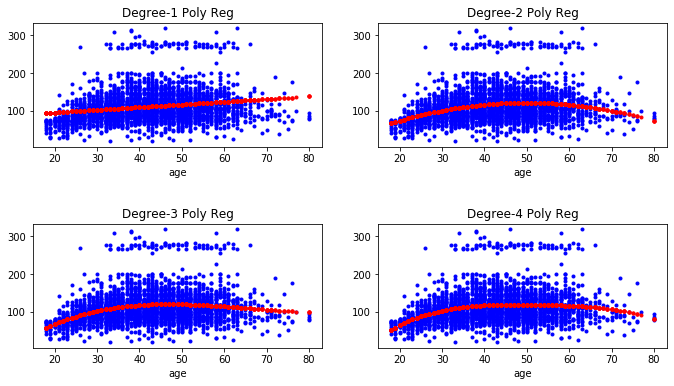

In [0]:
# Import PolynomialFeatures library 
from sklearn.preprocessing import PolynomialFeatures

# Import the linear regression library
from sklearn.linear_model import LinearRegression

# Populate our X values
X = df['age']

# Populate our Y values
y = df['wage']

# Create PolynomialFeatures of degrees 1-5
poly1 = PolynomialFeatures(degree=1)
poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=3)
poly4 = PolynomialFeatures(degree=4)
poly5 = PolynomialFeatures(degree=5)

# Reshape the X values
X1 = X.values.reshape(-1,1)

# Fit transform our X values for degree 1-5 polynomials
X1poly = poly1.fit_transform(X1)
X2poly = poly2.fit_transform(X1)
X3poly = poly3.fit_transform(X1)
X4poly = poly4.fit_transform(X1)
X5poly = poly5.fit_transform(X1)

# Create Linear Regression models for each degree polynomial
reg1 = LinearRegression()
reg2 = LinearRegression()
reg3 = LinearRegression()
reg4 = LinearRegression()
reg5 = LinearRegression()

# Display beta coefficients and intercepts for each degree polynomial
reg1.fit(X1poly, y)
print('polynomial degree-1')
print('beta0:', reg1.intercept_)
print('betas:',reg1.coef_)
print('\n')

reg2.fit(X2poly, y)
print('polynomial degree-2')
print('beta0:',reg2.intercept_)
print('betas:',reg2.coef_)
print('\n')

reg3.fit(X3poly, y)
print('polynomial degree-3')
print('beta0:',reg3.intercept_)
print('betas:',reg3.coef_)
print('\n')

reg4.fit(X4poly, y)
print('polynomial degree-4')
print('beta0:',reg4.intercept_)
print('betas:',reg4.coef_)
print('\n')

#reg1

# Plot the regressions to compare fits between 1-4 degree polynomials
fig, axs = plt.subplots(2,2, figsize=(10.0,6.0))
axs[0,0].plot(X,y,'.b')
axs[0,0].plot(X1poly[:,1],reg1.predict(X1poly),'.r')
axs[0,0].set_title('Degree-1 Poly Reg')
axs[0,0].set_xlabel('age')
axs[0,1].plot(X,y,'.b')
axs[0,1].plot(X2poly[:,1],reg2.predict(X2poly), '.r')
axs[0,1].set_title('Degree-2 Poly Reg')
axs[0,1].set_xlabel('age')
axs[1,0].plot(X,y,'.b')
axs[1,0].plot(X3poly[:,1],reg3.predict(X3poly),'.r')
axs[1,0].set_title('Degree-3 Poly Reg')
axs[1,0].set_xlabel('age')
axs[1,1].plot(X,y,'.b')
axs[1,1].plot(X4poly[:,1],reg4.predict(X4poly),'.r')
axs[1,1].set_title('Degree-4 Poly Reg')
axs[1,1].set_xlabel('age')
fig.tight_layout(pad=3.0)
#plt.scatter(X,y,color='red')
#plt.plot(X,reg.predict(X4poly), color='blue')

### Perform 5-fold cross validation (Degree = 3)

In [0]:
# Import necessary library to split data into a train and test set with 80/20
# split
from sklearn.model_selection import train_test_split

# Import library to compute cross validation scores
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [0]:
# Create Linear Regression model
lr = LinearRegression()

# Compute Cross Validation Scores
scores = cross_val_score(lr, # estimator model
                         X3poly, # Data to fit
                         y, # Target variable
                         cv=5, # Use 5-fold cross validation
                         scoring='r2') # Obtain the R^2 scoring

# Display average R^2 score with standard deviation
print("Average R^2 score for Degree-3: %0.5f (+/- %0.5f)" % (scores.mean(), 
                                                             scores.std()*2))

Average R^2 score for Degree-3: 0.08312 (+/- 0.01481)


### Perform 5-fold cross validation (Degree = 4)

In [0]:
# Create Linear Regression model
lr = LinearRegression()

# Compute Cross Validation Scores
scores = cross_val_score(lr, # estimator model
                         X4poly, # Data to fit
                         y, # Target variable
                         cv=5, # Use 5-fold cross validation
                         scoring='r2') # Obtain the R^2 scoring

# Display average R^2 score with standard deviation
print("Average R^2 score for Degree-4: %0.5f (+/- %0.5f)" % (scores.mean(), 
                                                             scores.std()*2))

Average R^2 score for Degree-4: 0.08355 (+/- 0.01217)


### Perform 5-fold cross validation (Degree = 5)

In [0]:
# Create Linear Regression model
lr = LinearRegression()

# Compute Cross Validation Scores
scores = cross_val_score(lr, # estimator model
                         X5poly, # Data to fit
                         y, # Target variable
                         cv=5, # Use 5-fold cross validation
                         scoring='r2') # Obtain the R^2 scoring

# Display average R^2 score with standard deviation
print("Average R^2 score for Degree-5: %0.5f (+/- %0.5f)" % (scores.mean(), 
                                                             scores.std()*2))

Average R^2 score for Degree-5: 0.08258 (+/- 0.01369)


### Build Degree 5 poly using `statsmodel`

In [0]:
import statsmodels.api as sm 
xp = poly5.fit_transform(X1)
model = sm.OLS(y, poly5.fit_transform(X1)).fit()
ypred = model.predict(xp)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     56.71
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           1.67e-56
Time:                        01:20:57   Log-Likelihood:                -15314.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2994   BIC:                         3.068e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.7046    161.435     -0.308      0.758    -366.239     266.830
x1             3.9930     20.110      0.199      0.843     -35.438      43.424
x2             0.2760      0.958      0.288      0.773      -1.603       2.155
x3            -0.0126      0.022     -0.577      0.564      -0.056       0.030
x4             0.0002      0.000      0.762      0.446      -0.000       0.001
x5         -9.157e-07   1.02e-06     -0.897      0.370   -2.92e-06    1.09e-06
==============================================================================
Omnibus:                     1094.840   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4940.229
Skew:                           1.718   Prob(JB):                         0.00
Kurtosis:                       8.265   Cond. No.                     9.39e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

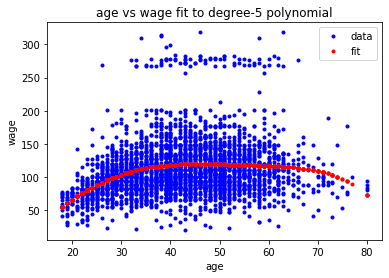

In [0]:
plt.plot(X,y,'.b', label ='data')
plt.plot(xp[:,1],ypred,'.r',label='fit')
plt.ylabel('wage')
plt.xlabel('age')
plt.title('age vs wage fit to degree-5 polynomial')
plt.legend(loc='upper right')

The `p-value` associated with hypothesis tests is 0.370 which is greater than 0.05 and therefor we fail to reject the null 

hypothesis. Therefore, we accept the null hypothesis that the coefficient of the degree 5 term is zero. As can be seen 

from the summary data the value is $\approx 10^-6$ which is $\approx 0.$

## Ridge Regularization

<br>

$$\ell(\beta)=(\mathbf{y}-\mathbf{X}^T\beta)^T(\mathbf{y}-\mathbf{X}^T\beta)+\alpha\beta^T\hat{I}\beta$$

<br>

where

<br>

$$\hat{I}=\begin{pmatrix}0& & &\\ &1& & \\ & & \ddots & \\ & & & 1
\end{pmatrix}$$


### Derive the expression of $\frac{\partial\ell}{\partial\beta}$

<br>

$$\frac{\partial\ell}{\partial\beta} = \frac{\partial}{\partial\beta}\left[(\mathbf{y}-\mathbf{X}^T\beta)^T(\mathbf{y}-\mathbf{X}^T\beta)\right] + \frac{\partial}{\partial\beta}\left[\alpha\beta^T\mathbf{\hat{I}}\beta\right]$$

<br>

$$=\frac{\partial}{\partial\beta}\left[\mathbf{y}^T\cdot\mathbf{y}-\beta^T\cdot\mathbf{X}^T\cdot\mathbf{y}-\mathbf{y}^T\cdot\mathbf{X}\cdot\beta+\beta^T\cdot\mathbf{X}^T\cdot\mathbf{X}\cdot\beta\right] + \frac{\partial}{\partial\beta}\left[\alpha\beta^T\mathbf{\hat{I}}\beta\right]$$

<br>

<hr>

<br>

Starting with the first partial derivative, we can see that no 

beta parameters are in the derivative and hence with respect to 

$\beta$ the value in the partial derivate is treated as a 

constant and the derivate goes to zero.

<br>

$$\frac{\partial}{\partial\beta} \mathbf{y}^T\cdot\mathbf{y} = \boxed{0}$$

<br>

<hr>

Next we have the partial derivative of the following term:

<br> 

$$-  \frac{\partial}{\partial\beta} \beta^T\cdot\mathbf{X}^T\cdot\mathbf{y}\rightarrow-\frac{\partial}{\partial\beta}\left(\mathbf{X}\cdot\beta\right)^T\cdot\mathbf{y}$$

<br>

We also have the term 

<br>

$$\mathbf{y}^T\cdot\left(\mathbf{X}\cdot\beta\right)$$

<br>

From the commutative property we can see that 

<br>

$$ \mathbf{X}\cdot\mathbf{y}^T \equiv \mathbf{y}\cdot\mathbf{X}^T$$

<br>

$$ \therefore \left(\mathbf{X}\cdot\beta \right)^T\cdot\mathbf{y} = \mathbf{y}^T\cdot\left(\mathbf{X}\cdot\beta\right) $$

<br>

Applying the commutative property and combing the two 

similar terms we reduce the need of doing two partial 

derivates since the partial derivate of the sum is 

equivalant to the sum of the partial derivatives. So 

we now just need to compute the following:

<br>

$$ -\frac{\partial}{\partial\beta} 2 \left(\mathbf{X}\cdot\beta\right)^T\cdot\mathbf{y} $$

<br>

Now we take the constant 2 out and apply the transpose 

on $\left(\mathbf{X}\cdot\beta\right)^T$ giving us

<br>

$$-2 \frac{\partial}{\partial\beta}\beta^T\cdot\mathbf{X}^T\cdot\mathbf{y}$$

<br>

and using the property

<br>

$$ \frac{\partial x^T\mathbf{A}}{\partial x} = \mathbf{A}^T $$

<br>

where 

<br>

$$ \mathbf{A} = \mathbf{X}^T\cdot\mathbf{y} $$

<br>

we will get

<br>

$$ -2\frac{\partial}{\partial\beta}\beta^T\cdot\mathbf{X}^T\cdot\mathbf{y} = -2 \left(\mathbf{X}^T\cdot\mathbf{y}\right)^T=\boxed{-2\mathbf{y}^T\cdot\mathbf{X}} $$

<br>

<hr>

<br>

$$\frac{\partial}{\partial\beta}\beta^T\cdot\mathbf{X}^T\cdot\mathbf{X}\cdot\beta$$

<br>

We can apply the matrix calculus formula

<br>

$$ \frac{\partial x^T\mathbf{A}x}{\partial x}=x^T\left(\mathbf{A}+\mathbf{A}^T\right)$$

<br>

which will result in

<br>

$$ \frac{\partial}{\partial\beta}\beta^T\cdot\mathbf{X}^T\cdot\mathbf{X}\cdot\beta = \beta^T\left(\left(\mathbf{X}^T\cdot\mathbf{X}\right)+\left(\mathbf{X}^T\cdot\mathbf{X}\right)^T\right)$$

<br>

$$ = 2\beta^T\left(\mathbf{X}^T\cdot\mathbf{X}\right) $$

<br>

$$ = \boxed{2\left(\mathbf{X}^T\cdot\mathbf{X}\right)\beta}$$

<br>

<hr>

<br>

$$\frac{\partial}{\partial\beta} \alpha\beta^T\hat{I}\beta$$

<br>

First off with this term we can take out $\alpha$ as it 

is a constant value 

<br>

$$ \alpha \frac{\partial}{\partial\beta} \beta^T\cdot\hat{I}\cdot\beta$$

<br>

Now using the matrix formula

<br>

$$ \frac{\partial x^T\mathbf{A}x}{\partial x} = x^T\left(\mathbf{A}+\mathbf{A}^T\right) $$

<br>

We will get the result

<br>

$$ = \alpha\frac{\partial}{\partial\beta}\beta^T\mathbf{\hat{I}}\beta = \alpha\beta^T\left(\mathbf{\hat{I}}+\mathbf{\hat{I}}^T\right) $$

<br>

We can see that $\hat{I}$ is just an identity matrix and 

therefore the transpose will be itself. Using this property 

we can further simplify the result to obtain

<br>

$$ \alpha\beta^T\left(2\mathbf{\hat{I}}\right) = \boxed{2\alpha\mathbf{\hat{I}}\beta}$$

<br>

<hr>

<br>

Putting all the terms together, we have the complete partial 

derivate w.r.t. $\beta$ being

<br>

<br> 

$$ \frac{\partial\ell}{\partial\beta} = -2\mathbf{X}^T\mathbf{y} + 2\left(\mathbf{X}^T\mathbf{X}\right)\beta + 2\alpha\mathbf{\hat{I}}\beta $$

<br>

### Derive the expression of $argmin_\beta\ell(\beta)$

<br>

$$argmin_\beta\ell(\beta) = \frac{\partial\ell}{\partial\beta}=0$$

<br>

From the previous response, we have derived w.r.t. $\beta$ the following

<br>

$$ \frac{\partial\ell}{\partial\beta} = -2\mathbf{X}^T\mathbf{y}+2\left(\mathbf{X}^T\mathbf{X}\right)\beta+2\alpha\mathbf{\hat{I}}\beta$$

<br>

The global minimum will be found when this equation equals 0.

So we can set the equation equal to zero and solve for $\beta$.

<br>

$$ 2\left(\mathbf{X}^T\mathbf{X}\right)\beta+2\alpha\mathbf{\hat{I}}\beta-2\mathbf{X}^T\mathbf{y} = 0$$

<br>

$$ 2\left(\mathbf{X}^T\mathbf{X}\right)\beta+2\alpha\mathbf{\hat{I}}\beta = 2\mathbf{X}^T\mathbf{y}$$

<br>

$$ \beta = \frac{2\mathbf{X}^T\mathbf{y}}{2\left(\mathbf{X}^T\mathbf{X} + \alpha\mathbf{\hat{I}}\right)}$$

<br>

$$\therefore \beta = \boxed{\left(\mathbf{X}^T\mathbf{X}+\alpha\hat{I})^{-1}\mathbf{X}^T\mathbf{y}\right)}$$